Store this Python note book in a folder called `Scripts` MUST be case sensitive. Data must be stored in `Data` folder. This script will take care of the rest.

In [1]:
import pandas as pd

## Load the excel file and save it as CSV

In [2]:
# Load the workbook
excel_file = '/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/Mantra data workbook_Male.xlsx'

# Read all sheets into a dictionary of DataFrames
before = pd.read_excel(excel_file, sheet_name="BEFORE")
during = pd.read_excel(excel_file, sheet_name="DURING")
after = pd.read_excel(excel_file, sheet_name="AFTER")

# Drop the time columns
columns_to_drop = ["Time, min", "Time, sec"]

before_data = before.drop(columns=columns_to_drop)
during_data = during.drop(columns=columns_to_drop)
after_data = after.drop(columns=columns_to_drop)

before_data.to_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/before_male.csv', index=False)
during_data.to_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/during_male.csv', index=False)
after_data.to_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/after_male.csv', index=False)


## Store all the data of each individual by their ID

In [3]:
before_data = pd.read_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/before_male.csv')
during_data = pd.read_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/during_male.csv')
after_data = pd.read_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Data/after_male.csv')

def split_dataframe_by_id_increment(df, column_name):
    split_indices = [0] 
    sl_no_values = df[column_name].fillna(method='ffill').values  # Fill NaN values
    for i in range(1, len(sl_no_values)):
        if sl_no_values[i] > sl_no_values[i - 1]:
            split_indices.append(i)
    split_indices.append(len(df)) 
    
    return [df.iloc[split_indices[j]:split_indices[j+1]] for j in range(len(split_indices) - 1)]

before_subject_dfs = split_dataframe_by_id_increment(before_data, column_name="BEFORE")
during_subject_dfs = split_dataframe_by_id_increment(during_data, column_name="DURING")
after_subject_dfs = split_dataframe_by_id_increment(after_data, column_name="AFTER")

for i in range(len(before_subject_dfs) - 1):
    before_subject_dfs[i] = before_subject_dfs[i].dropna(how='all')
    during_subject_dfs[i] = during_subject_dfs[i].dropna(how='all')
    after_subject_dfs[i] = after_subject_dfs[i].dropna(how='all')

print("Total unique IDs:", len(before_subject_dfs))
if len(before_subject_dfs) == len(during_subject_dfs) == len(after_subject_dfs):
    print("Number of IDs found in each of the files are equal.")

Total unique IDs: 15
Number of IDs found in each of the files are equal.


/tmp/ipykernel_897430/2603532322.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sl_no_values = df[column_name].fillna(method='ffill').values  # Fill NaN values


## Visulise a Legend enabled plot

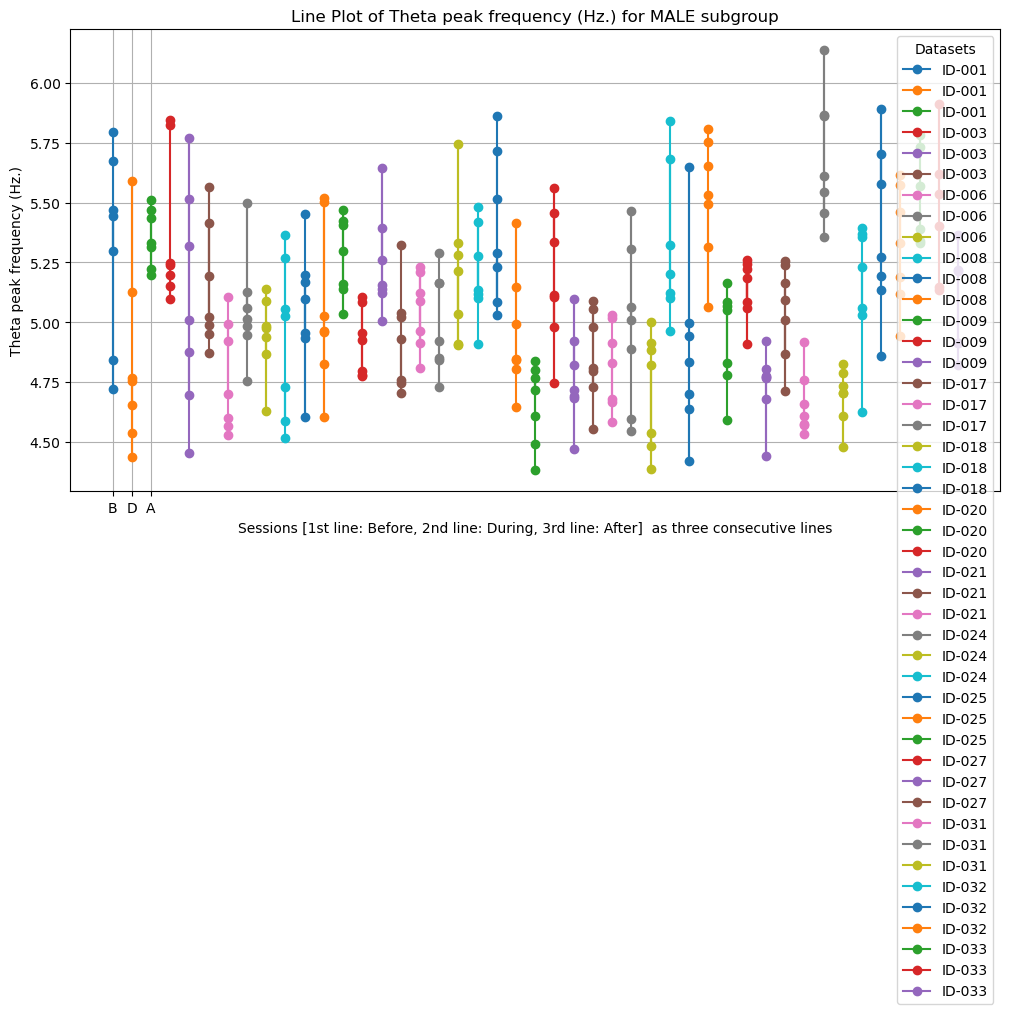

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_line_plots(datasets1, datasets2, datasets3, column_to_visualize):
    """
    Visualizes line plots for a specified column across three lists of datasets.
    
    Parameters:
    datasets1 (list): First list of pandas DataFrames.
    datasets2 (list): Second list of pandas DataFrames.
    datasets3 (list): Third list of pandas DataFrames.
    column_to_visualize (str): The name of the column to visualize.
    
    Returns:
    None
    """
    plt.figure(figsize=(12, 6))

    # Set base index for x-axis
    base_index = 0

    # Loop through the datasets
    for i in range(min(len(datasets1), len(datasets2), len(datasets3))):
        df1, df2, df3 = datasets1[i], datasets2[i], datasets3[i]

        # Check if the specified column exists in the DataFrames
        if column_to_visualize in df1.columns and column_to_visualize in df2.columns and column_to_visualize in df3.columns:
            # Select the points to plot from each dataset
            data_to_plot1 = df1[column_to_visualize].head(8)  # First 8 rows from the first dataset
            data_to_plot2 = df2[column_to_visualize].head(8)  # Next 9 rows from the second dataset
            data_to_plot3 = df3[column_to_visualize].head(8) # Next 10 rows from the third dataset
            
            # Get the legend label from the 2nd row of the first column
            legend_label1 = df1.iloc[0, 0] if len(df1) > 1 else f'Dataset 1-{i+1}'
            legend_label2 = df2.iloc[0, 0] if len(df2) > 1 else f'Dataset 2-{i+1}'
            legend_label3 = df3.iloc[0, 0] if len(df3) > 1 else f'Dataset 3-{i+1}'

            # Plot each dataset with shifted x-axis positions
            plt.plot([base_index] * len(data_to_plot1), data_to_plot1, 'o-', label=legend_label1)
            plt.plot([base_index + 1] * len(data_to_plot2), data_to_plot2, 'o-', label=legend_label2)
            plt.plot([base_index + 2] * len(data_to_plot3), data_to_plot3, 'o-', label=legend_label3)

            # Update base_index for the next datasets
            base_index += 3

    # Customize the x-ticks
    plt.xticks(range(3), ['B', 'D', 'A'])

    plt.title(f'Line Plot of {column_to_visualize} for MALE subgroup')
    plt.xlabel('Sessions [1st line: Before, 2nd line: During, 3rd line: After]  as three consecutive lines')
    plt.ylabel(column_to_visualize)
    plt.legend(title='Datasets')
    plt.grid(True)
    plt.show()

visualize_line_plots(before_subject_dfs, during_subject_dfs, after_subject_dfs, column_to_visualize='Theta peak frequency (Hz.)')

## Vizualise a plot per parameter with minimal colors and no legends

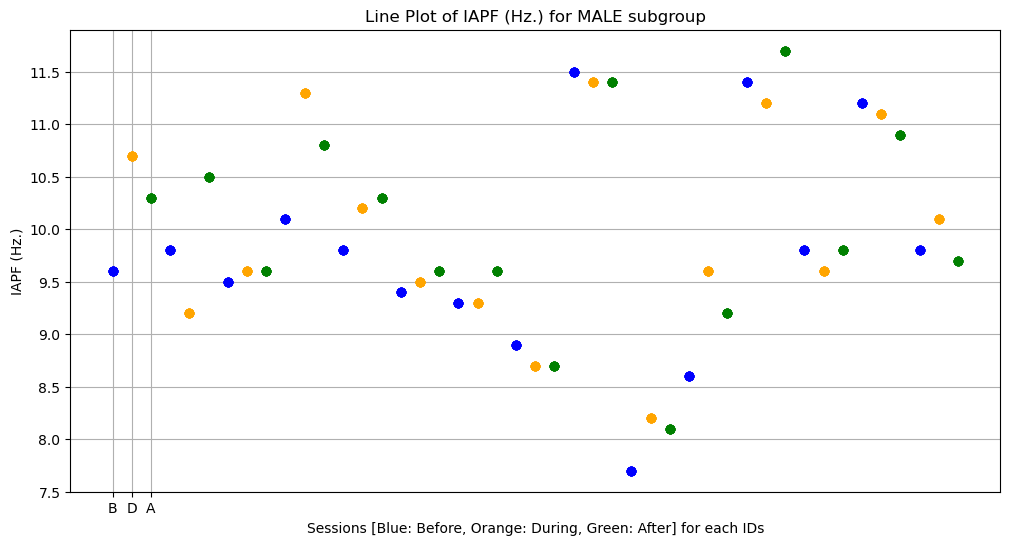

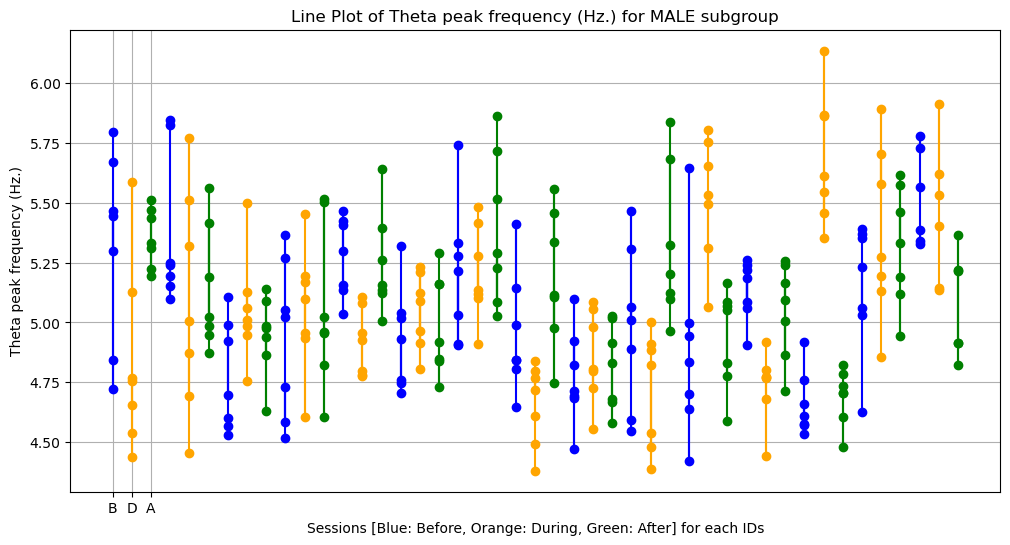

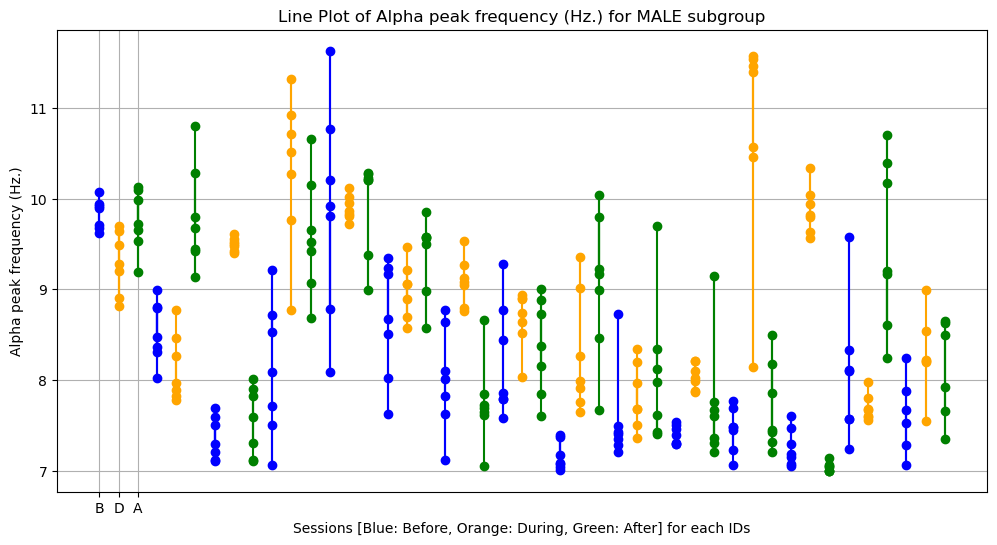

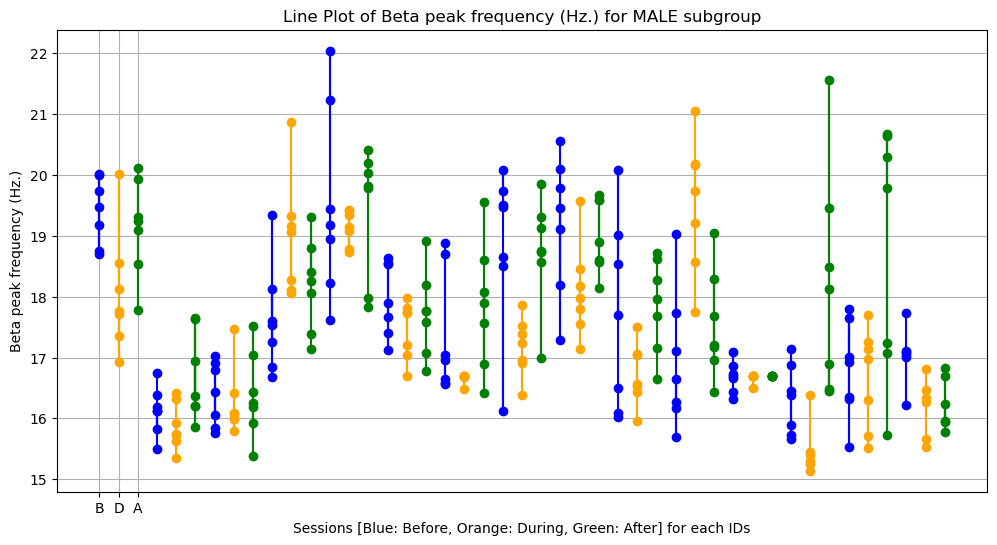

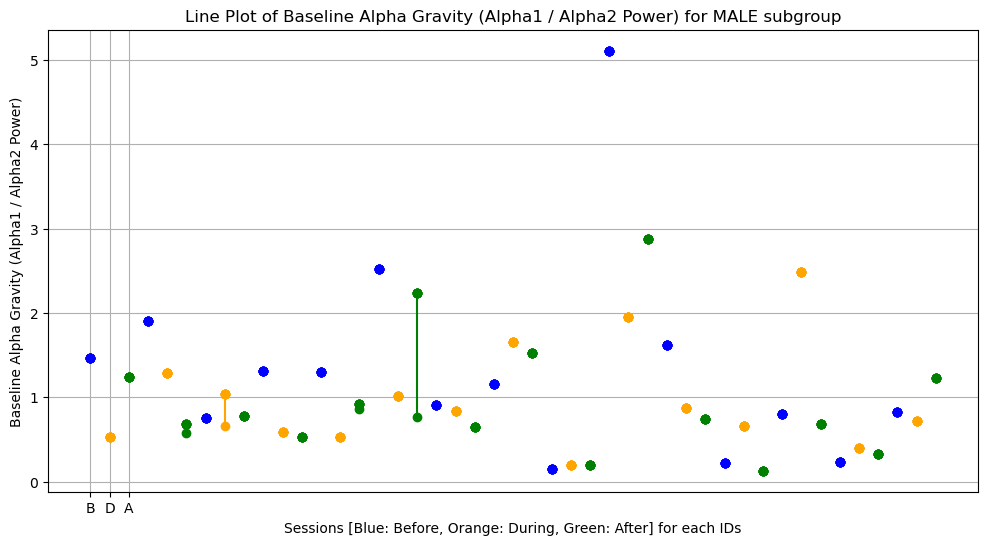

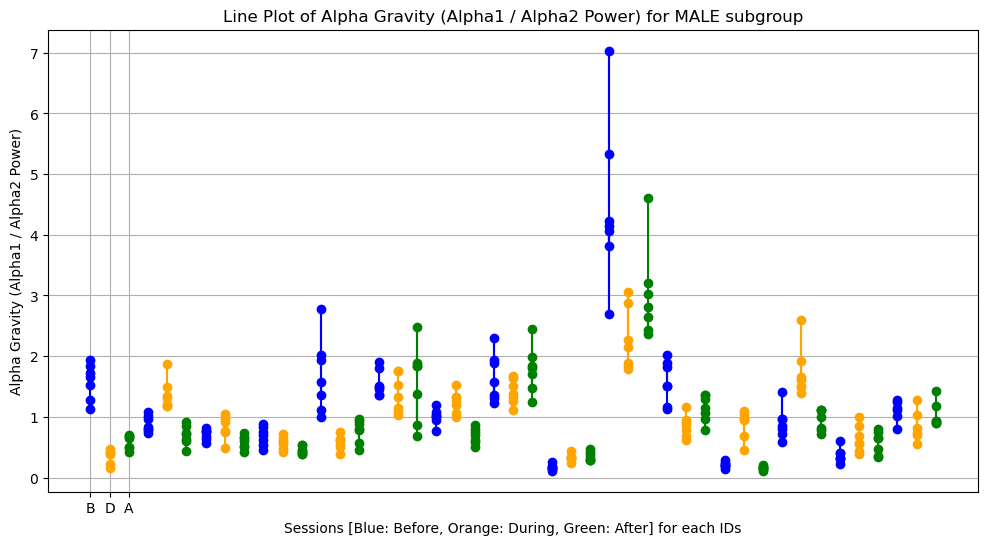

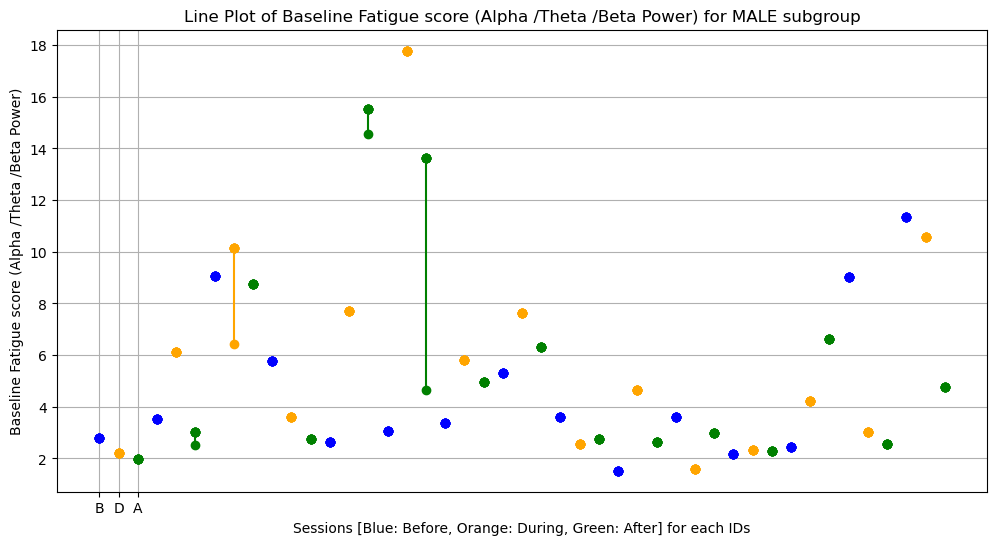

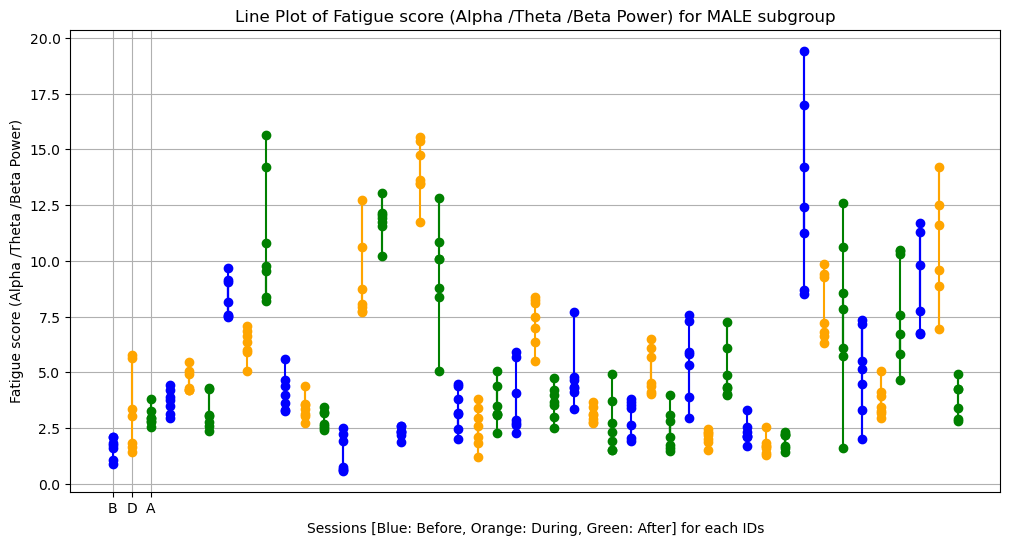

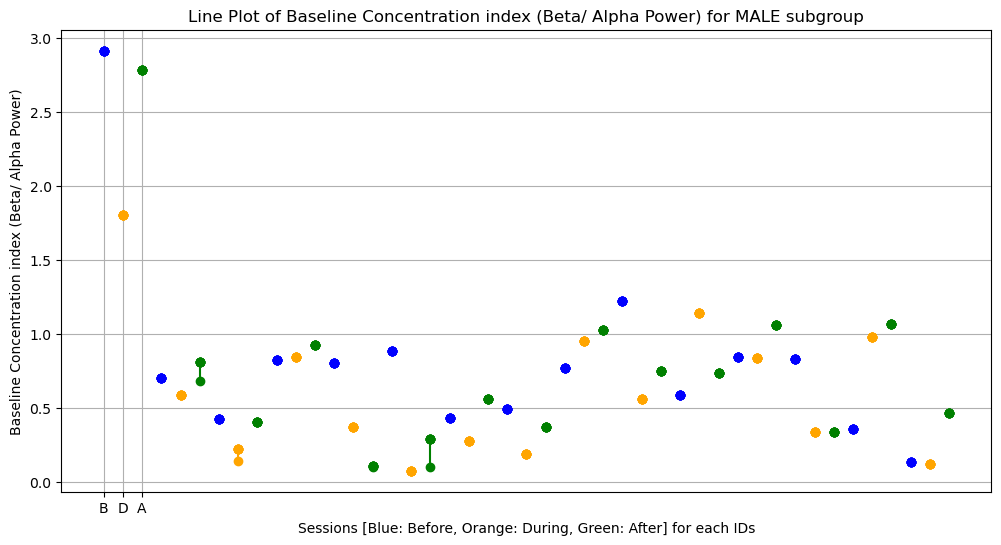

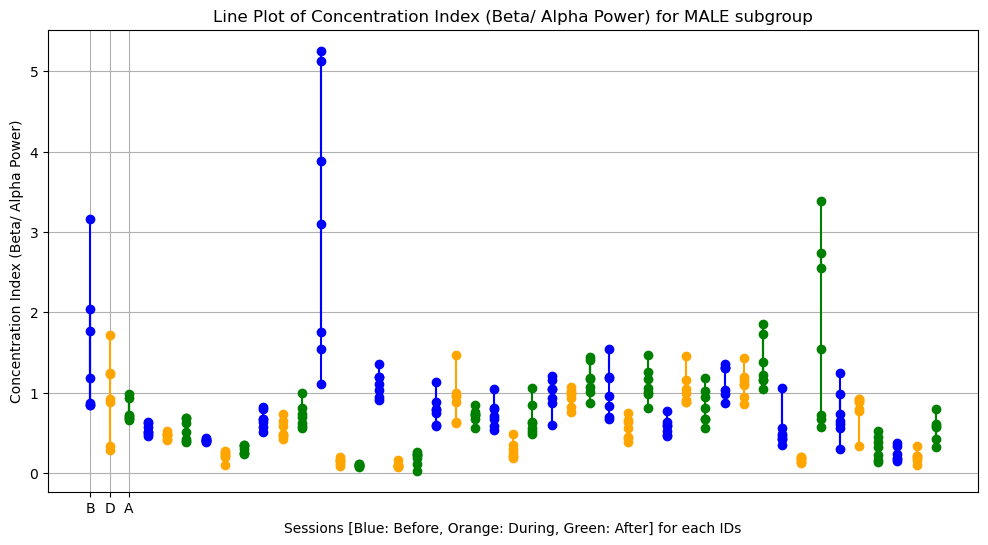

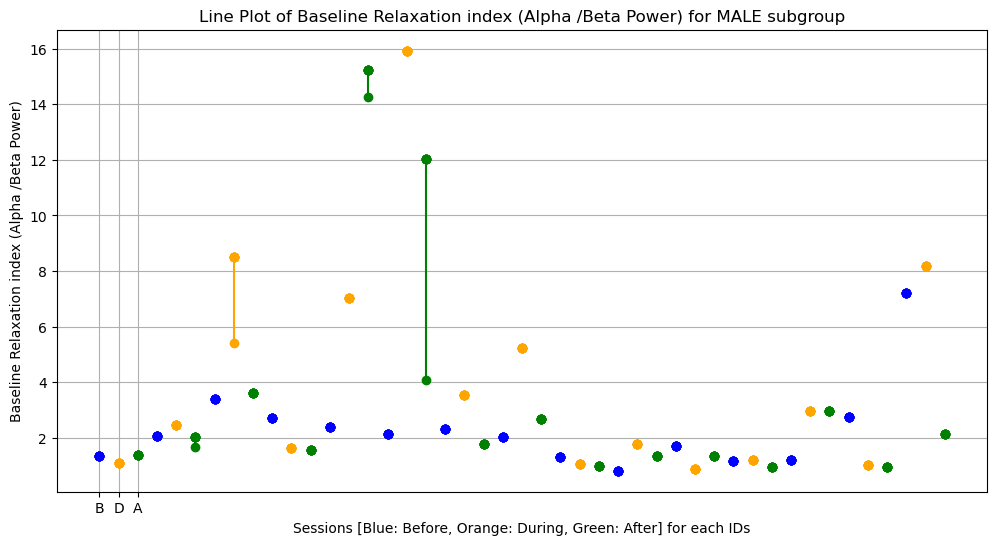

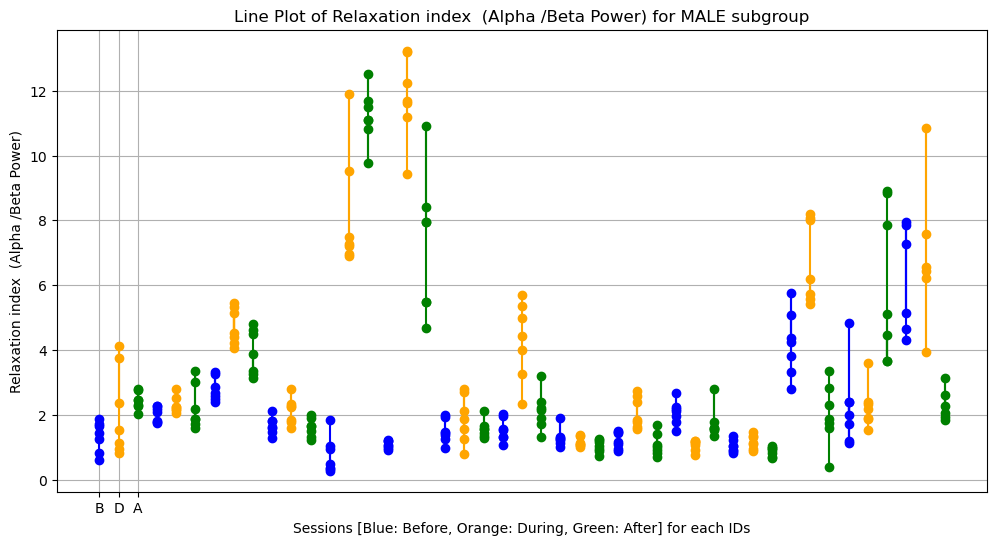

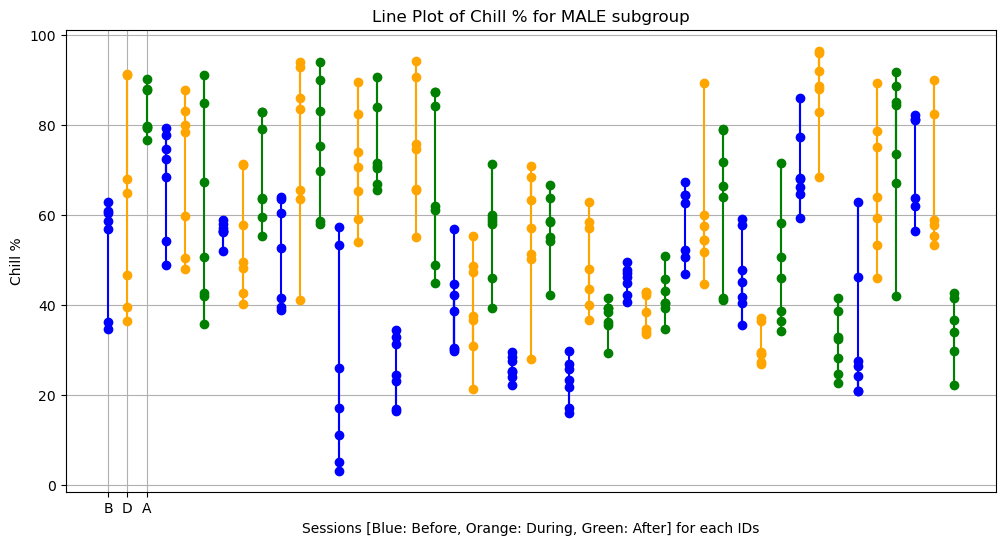

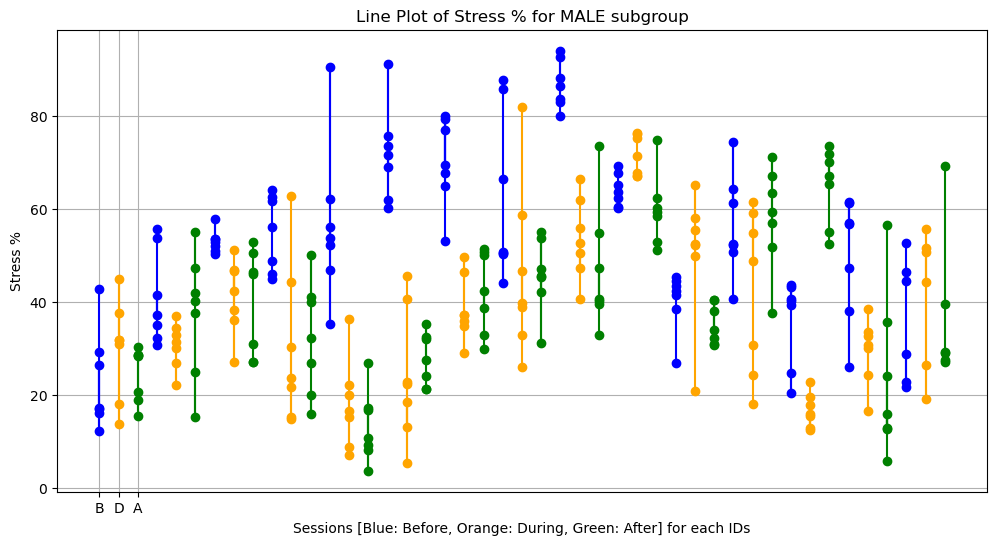

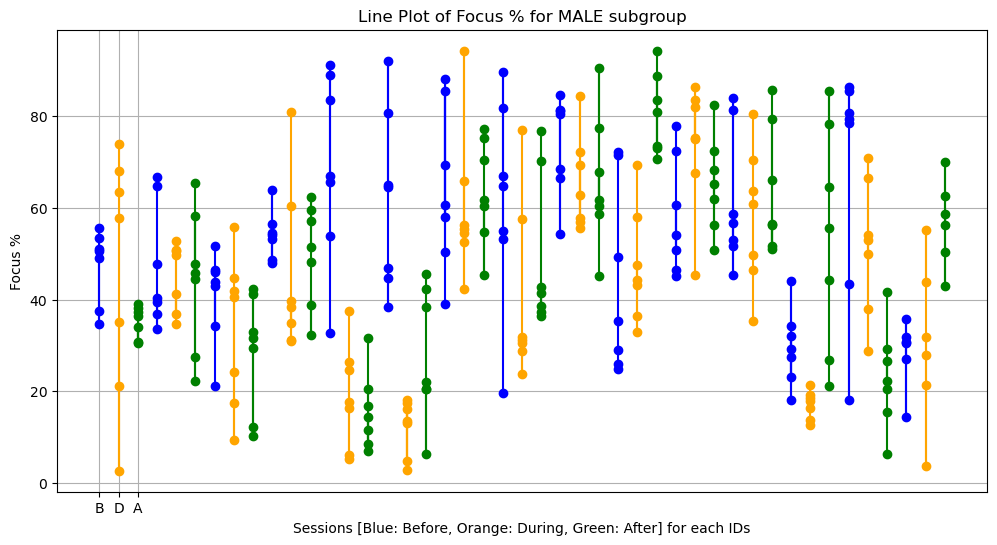

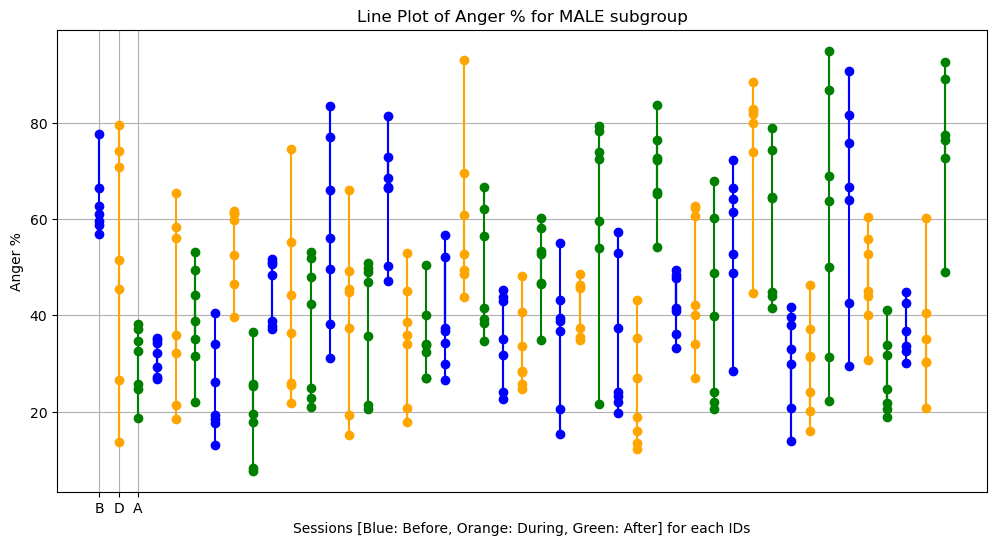

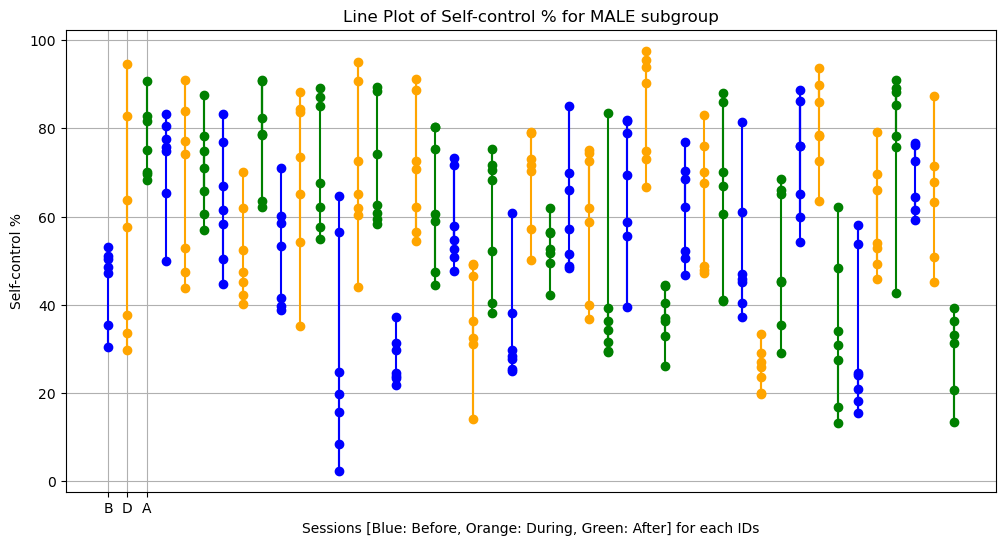

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_line_plots(datasets1, datasets2, datasets3, columns_to_visualize):
    """
    Visualizes line plots for specified columns across three lists of datasets.
    
    Parameters:
    datasets1 (list): First list of pandas DataFrames.
    datasets2 (list): Second list of pandas DataFrames.
    datasets3 (list): Third list of pandas DataFrames.
    columns_to_visualize (list): List of column names to visualize.
    
    Returns:
    None
    """
    # Loop through each column to visualize
    for column_to_visualize in columns_to_visualize:
        plt.figure(figsize=(12, 6))

        # Set base index for x-axis
        base_index = 0

        # Loop through the datasets
        for i in range(min(len(datasets1), len(datasets2), len(datasets3))):
            df1, df2, df3 = datasets1[i], datasets2[i], datasets3[i]

            # Check if the specified column exists in the DataFrames
            if (column_to_visualize in df1.columns and 
                column_to_visualize in df2.columns and 
                column_to_visualize in df3.columns):
                
                # Select the points to plot from each dataset
                data_to_plot1 = df1[column_to_visualize].head(8)  # First 8 rows from the first dataset
                data_to_plot2 = df2[column_to_visualize].head(8)  # First 8 rows from the second dataset
                data_to_plot3 = df3[column_to_visualize].head(8)  # First 8 rows from the third dataset
                
                # Get the legend label from the 2nd row of the first column
                legend_label1 = df1.iloc[0, 0] if len(df1) > 1 else f'Dataset 1-{i+1}'
                legend_label2 = df2.iloc[0, 0] if len(df2) > 1 else f'Dataset 2-{i+1}'
                legend_label3 = df3.iloc[0, 0] if len(df3) > 1 else f'Dataset 3-{i+1}'

                # Plot each dataset with shifted x-axis positions
                plt.plot([base_index] * len(data_to_plot1), data_to_plot1, 'o-', color='blue')
                plt.plot([base_index + 1] * len(data_to_plot2), data_to_plot2, 'o-', color='orange')
                plt.plot([base_index + 2] * len(data_to_plot3), data_to_plot3, 'o-', color='green')

                # Calculate the max y value to position the text labels
                max_y1 = max(data_to_plot1)
                max_y2 = max(data_to_plot2)
                max_y3 = max(data_to_plot3)

                # Check for finite values before plotting text
                if np.isfinite(max_y1):
                    plt.text(base_index, max_y1 + 0.5, legend_label1, ha='center', va='bottom', fontsize=10, rotation=0)

                if np.isfinite(max_y2):
                    plt.text(base_index + 1, max_y2 + 0.5, legend_label2, ha='center', va='bottom', fontsize=10, rotation=0)

                if np.isfinite(max_y3):
                    plt.text(base_index + 2, max_y3 + 0.5, legend_label3, ha='center', va='bottom', fontsize=10, rotation=0)

                # Update base_index for the next datasets
                base_index += 3

        # Customize the x-ticks
        plt.xticks(range(3), ['B', 'D', 'A'])

        plt.title(f'Line Plot of {column_to_visualize} for MALE subgroup')
        plt.xlabel('Sessions [Blue: Before, Orange: During, Green: After] for each IDs')
        plt.ylabel(column_to_visualize)
        plt.grid(True)
        plt.show()

# Example usage with multiple columns
columns_to_visualize = ["IAPF (Hz.)","Theta peak frequency (Hz.)","Alpha peak frequency (Hz.)","Beta peak frequency (Hz.)","Baseline Alpha Gravity (Alpha1 / Alpha2 Power)","Alpha Gravity (Alpha1 / Alpha2 Power)","Baseline Fatigue score (Alpha /Theta /Beta Power)","Fatigue score (Alpha /Theta /Beta Power)","Baseline Concentration index (Beta/ Alpha Power)","Concentration Index (Beta/ Alpha Power)","Baseline Relaxation index (Alpha /Beta Power)","Relaxation index  (Alpha /Beta Power)","Chill %","Stress %","Focus %","Anger %","Self-control %"]
visualize_line_plots(before_subject_dfs, during_subject_dfs, after_subject_dfs, columns_to_visualize)

## Create the directories required to store generated files during this script, neatly

In [6]:
!mkdir ../Consolidated\ Tables ../Conclusions

## Generate a Consolidated table with Quantitative change in % for each individual

In [7]:
import pandas as pd

def calculate_percentage_increase(before_dfs, during_dfs, after_dfs, columns_to_calculate):
    """
    Calculate the percentage increase for specified columns from 'Before' to 'During' and 'Before' to 'After' datasets,
    with meaningful labels extracted from the second row of the first column of each dataset.
    
    Parameters:
    before_dfs (list): List of pandas DataFrames for the 'Before' condition.
    during_dfs (list): List of pandas DataFrames for the 'During' condition.
    after_dfs (list): List of pandas DataFrames for the 'After' condition.
    columns_to_calculate (list): List of column names to calculate percentage increases for.

    Returns:
    pd.DataFrame: DataFrame containing percentage increases for each subject and column.
    """
    results = []

    # Loop through each subject's datasets
    for i in range(min(len(before_dfs), len(during_dfs), len(after_dfs))):
        before_df, during_df, after_df = before_dfs[i], during_dfs[i], after_dfs[i]

        # Get the meaningful label from the 2nd row, first column (row index 1, column index 0)
        label = before_df.iloc[0, 0] if len(before_df) > 1 else f'Dataset 1-{i+1}'

        subject_results = {'Subject': label}

        # Calculate percentage increase for each column
        for column in columns_to_calculate:
            if column in before_df.columns and column in during_df.columns and column in after_df.columns:
                before_values = before_df[column].head(8).median()  # Calculate the mean of the first 8 rows
                during_values = during_df[column].head(8).median()
                after_values = after_df[column].head(8).median()

                # Calculate percentage increases
                if before_values != 0:
                    percentage_increase_during = ((during_values - before_values) / before_values) * 100
                    percentage_increase_after = ((after_values - before_values) / before_values) * 100
                else:
                    percentage_increase_during = percentage_increase_after = None

                # Store the results in the dictionary
                subject_results[f'{column} % Increase During'] = percentage_increase_during
                subject_results[f'{column} % Increase After'] = percentage_increase_after

        results.append(subject_results)

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Define columns to calculate
columns_to_calculate = ["IAPF (Hz.)","Theta peak frequency (Hz.)","Alpha peak frequency (Hz.)","Beta peak frequency (Hz.)",
                        "Baseline Alpha Gravity (Alpha1 / Alpha2 Power)","Alpha Gravity (Alpha1 / Alpha2 Power)",
                        "Baseline Fatigue score (Alpha /Theta /Beta Power)","Fatigue score (Alpha /Theta /Beta Power)",
                        "Baseline Concentration index (Beta/ Alpha Power)","Concentration Index (Beta/ Alpha Power)",
                        "Baseline Relaxation index (Alpha /Beta Power)","Relaxation index  (Alpha /Beta Power)",
                        "Chill %","Stress %","Focus %","Anger %","Self-control %"]

# Calculate the percentage increase for all subjects using custom labels
percentage_increase_df = calculate_percentage_increase(before_subject_dfs, during_subject_dfs, after_subject_dfs, columns_to_calculate)

# Save the results to a CSV file
percentage_increase_df.to_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Consolidated Tables/consolidated_percentage_increase_table_MALE.csv', index=False)

print("Consolidated table saved as 'consolidated_percentage_increase_table_MALE.csv'.")


Consolidated table saved as 'consolidated_percentage_increase_table_MALE.csv'.


# Calculate Mean values for all the parameters from the consolidated table, to give average change in %

In [8]:
import pandas as pd

# Assuming percentage_increase_df is your dataframe and the first column contains the phases (Before, During, After)
mean_values = percentage_increase_df.iloc[:, 1:].mean()

# Convert the mean values to a DataFrame for better formatting
mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])

# Save the DataFrame to a CSV file
mean_values_df.to_csv('/home/karthik/BCI-Internship/HKM SubGroups Analysis/Consolidated Tables/consolidated_table_means_MALE.csv', index=True)

print("Mean values saved")

Mean values saved


# Formulate the Mean values in User Friendly format as .txt file

In [9]:
import pandas as pd

def derive_conclusions_from_csv(csv_file_path):
    """
    Derive quantitative conclusions based on the mean values from a CSV file.
    
    Parameters:
    csv_file_path (str): Path to the CSV file containing mean values with % increase during and after chanting.

    Returns:
    conclusions (list): A list of conclusion strings derived from the mean table.
    """

    # Read the CSV file
    mean_table = pd.read_csv(csv_file_path, index_col=0)

    # Initialize a dictionary to hold the conclusions
    conclusions_dict = {}

    # Loop through each parameter and calculate conclusions
    for parameter, value in mean_table['Mean'].items():
        # Determine increase/decrease based on the value
        if value > 0:
            increase_decrease = "increase"
        else:
            increase_decrease = "decrease"
        
        # Extract the phase (During or After)
        phase = parameter.split("%")[0].strip()

        # Store conclusions in a dictionary with a unique key for each parameter
        if "During" in parameter:
            conclusions_dict[phase] = conclusions_dict.get(phase, {})  # Initialize if not exists
            conclusions_dict[phase]['During'] = f"{phase} shows {increase_decrease} of {abs(value):.2f}% during the chanting."
        elif "After" in parameter:
            conclusions_dict[phase]['After'] = f"After completion of chant, a net {increase_decrease} of {abs(value):.2f}%."

    # Create a consolidated list of conclusions
    consolidated_conclusions = []
    for phase in conclusions_dict:
        during = conclusions_dict[phase].get('During', '')
        after = conclusions_dict[phase].get('After', '')
        consolidated_conclusions.append(f"{during} {after}")

    return consolidated_conclusions

# Path to the consolidated means CSV file
consolidated_means = "/home/karthik/BCI-Internship/HKM SubGroups Analysis/Consolidated Tables/consolidated_table_means_MALE.csv"

# Get conclusions from the CSV file
conclusions = derive_conclusions_from_csv(consolidated_means)

# Print conclusions with numbering
for idx, conclusion in enumerate(conclusions, start=1):
    print(f"{idx}. {conclusion.strip()}")

# Optional: Save conclusions to a text file
with open("/home/karthik/BCI-Internship/HKM SubGroups Analysis/Conclusions/chanting_conclusions_MALE.txt", "w") as f:
    for idx, conclusion in enumerate(conclusions, start=1):
        f.write(f"{idx}. {conclusion.strip()}\n")

print("Conclusions saved to 'chanting_conclusions_MALE.txt'.")


1. IAPF (Hz.) shows increase of 2.45% during the chanting. After completion of chant, a net increase of 2.72%.
2. Theta peak frequency (Hz.) shows increase of 0.68% during the chanting. After completion of chant, a net increase of 0.54%.
3. Alpha peak frequency (Hz.) shows increase of 12.90% during the chanting. After completion of chant, a net increase of 7.28%.
4. Beta peak frequency (Hz.) shows decrease of 1.66% during the chanting. After completion of chant, a net increase of 2.12%.
5. Baseline Alpha Gravity (Alpha1 / Alpha2 Power) shows increase of 13.04% during the chanting. After completion of chant, a net decrease of 13.85%.
6. Alpha Gravity (Alpha1 / Alpha2 Power) shows increase of 30.42% during the chanting. After completion of chant, a net decrease of 2.59%.
7. Baseline Fatigue score (Alpha /Theta /Beta Power) shows increase of 62.61% during the chanting. After completion of chant, a net increase of 58.21%.
8. Fatigue score (Alpha /Theta /Beta Power) shows increase of 101.86

# END of the script